In [1]:
# 용어 정리 
# 형태소 , 형태소 분석
# 형태소: 언어에서 의미가 가장 작은 단위. 
# 형태소 분석: 형태소, 어근, 접두사/접미사, 품사 등 다양한 속성 구조. 
# 품사 태깅 예) 상용 이가 좋아 하는 음식 은 국밥 이다. 
# 음식 : NNG, 이가/JKM , 좋아하는/VV, 이다/EFN , 높임말 : 하신다 -> 신/EPH
# 품사 태깅 해주는 패키지 : Hananum, Kkma, Komoran, Okt(Twitter 제공)
# Okt , 명사 /Noun , 에/ Josa, 먹는/ Verb , 다/Eomi 

In [1]:
# !pip install matplotlib
# !pip install wordcloud
!pip install konlpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import json
import re

# Okt , 한글 품사 태깅하기 위한 모듈, 도구.
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud 

In [2]:
# 샘플 데이터 읽어서, 메모리에서 확인해보기. 
inputFileName = "./sampleNateNews.json"
data = json.loads(open(inputFileName,"r",encoding = "utf-8").read())
data

[{'subject': ' 마이데이터 전 분야 확산  규제개혁위 9일 심의'},
 {'subject': ' 컨콜 네이버 대표  AI검색 서비스  큐  연내 모바일 출시 검토 '},
 {'subject': '펄어비스  국가유산청과 맞손 경복궁에서 만나는  아침의 나라  서울 '},
 {'subject': '유베이스 그룹 유진투자증권  공개매수 시장 혁신 MOU 체결'},
 {'subject': ' 컨콜 네이버  A홀딩스  라인야후 지분 약 1 2% 줄인다 日 상장 유지 조건 충족 '},
 {'subject': ' 이것  바꿨더니 1030 사용자 폭증 네이버  반전  쓴 비결'},
 {'subject': '네이버  사상 최대 매출 이익  3 5년 두 자릿수 성장세 확신  종합 '},
 {'subject': ' G 브리핑  엔미디어플랫폼   GETO PC방 핫타임 이벤트  진행'},
 {'subject': ' 콘텐츠 핫&뉴   오디션  한정판 여름 액세서리 획득 이벤트'},
 {'subject': ' 레드벨벳 아이린이 반미 反美 에 꽂혔다고   해외팬들 오역에 웃음폭발'},
 {'subject': '네이버 2분기 역대 최대 실적    라인야후 지분 축소 검토 안해 '},
 {'subject': '2분기 호실적에 웃은  네카오  AI 등 성장동력 확보는 과제'},
 {'subject': '게임물관리위 신임위원에 서태건 정의준'},
 {'subject': ' 컨콜종합  컴투스  내 외부 신작 가리지 않고 라인업 두텁게 확보 '},
 {'subject': '야당  유상임 후보 아들 마리화나 흡입 드러나  사퇴 요구'},
 {'subject': '일산병원  약제급여 적정성평가  1등급  획득'},
 {'subject': '메디톡스  2Q 매출 26% 오른 650억원 최대 매출 경신 기대'},
 {'subject': ' 컨콜 종합  역대 분기 최대 실적 네이버  日 라인에 대한 기존 전략 유지 '},
 {'subject': '시큐브  생체수기서명인증  시큐사인  FIDO2인

In [3]:
# 해당 데이터에서, 기사 내용인 , message 부분의 값 추출 작업. 
# 임시 저장 문자열
message = ""
# data = [{딕션너리1},{딕션너리2},{딕션너리3},...]
for item in data:
    if "subject" in item.keys():
        # (\w : 문자, 숫자 의미 ) 앞에 ^(not) 가 아닌 것은 모두 -> 공백으로 변경함. 
        # 하나의 임시 메세지 문자열 변수에 담기
        message = message + re.sub(r"[^\w]"," ", item["subject"]) + ""
message

' 마이데이터 전 분야 확산  규제개혁위 9일 심의 컨콜 네이버 대표  AI검색 서비스  큐  연내 모바일 출시 검토 펄어비스  국가유산청과 맞손 경복궁에서 만나는  아침의 나라  서울 유베이스 그룹 유진투자증권  공개매수 시장 혁신 MOU 체결 컨콜 네이버  A홀딩스  라인야후 지분 약 1 2  줄인다 日 상장 유지 조건 충족  이것  바꿨더니 1030 사용자 폭증 네이버  반전  쓴 비결네이버  사상 최대 매출 이익  3 5년 두 자릿수 성장세 확신  종합  G 브리핑  엔미디어플랫폼   GETO PC방 핫타임 이벤트  진행 콘텐츠 핫 뉴   오디션  한정판 여름 액세서리 획득 이벤트 레드벨벳 아이린이 반미 反美 에 꽂혔다고   해외팬들 오역에 웃음폭발네이버 2분기 역대 최대 실적    라인야후 지분 축소 검토 안해 2분기 호실적에 웃은  네카오  AI 등 성장동력 확보는 과제게임물관리위 신임위원에 서태건 정의준 컨콜종합  컴투스  내 외부 신작 가리지 않고 라인업 두텁게 확보 야당  유상임 후보 아들 마리화나 흡입 드러나  사퇴 요구일산병원  약제급여 적정성평가  1등급  획득메디톡스  2Q 매출 26  오른 650억원 최대 매출 경신 기대 컨콜 종합  역대 분기 최대 실적 네이버  日 라인에 대한 기존 전략 유지 시큐브  생체수기서명인증  시큐사인  FIDO2인증 획득KT  2분기 매출 선방에도 영업익 14 3  감소  임금협상 비용 반영  종합 美  외국 대리인  등록 신청한 존 리 우주청 본부장  기술 기밀정보 유출 없을 것 일본 진출 시동 건 토종  AI 마케팅  스타트업 브이캣컴투스  2분기 영업이익 14억원 2분기 연속 흑자  배틀그라운드 모바일   프로 리그  PMPS 2024 시즌 2  개막그라비티   라그나로크 온라인  22주년 기념 프로모션 실시엘앤씨바이오  中 불법 이식재 생산 사건 전화위복 될 것 배민 배달로봇  서울 수도권 도입KT  2분기 영업이익 4940억원카카오  전통시장  우수시장 조성사업  발대식LGU   미디어 산업대전서

In [4]:
# 품사 태깅, Okt 패키지 사용하기. 
nlp = Okt()
message_N = nlp.nouns(message)
message_N

['마이',
 '데이터',
 '전',
 '분야',
 '확산',
 '규제',
 '개혁',
 '위',
 '심의',
 '컨콜',
 '네이버',
 '대표',
 '검색',
 '서비스',
 '큐',
 '연내',
 '모바일',
 '출시',
 '검토',
 '펄',
 '어비스',
 '국가',
 '유산',
 '청과',
 '손',
 '경복궁',
 '아침',
 '나라',
 '서울',
 '유베',
 '이스',
 '그룹',
 '유진',
 '투자',
 '증권',
 '공개매수',
 '시장',
 '혁신',
 '체결',
 '컨콜',
 '네이버',
 '홀딩스',
 '라인',
 '야후',
 '분',
 '약',
 '상장',
 '유지',
 '조건',
 '충족',
 '것',
 '사용자',
 '폭증',
 '네이버',
 '반전',
 '비결',
 '네이버',
 '사상',
 '최대',
 '매출',
 '이익',
 '두',
 '자릿수',
 '성장',
 '세',
 '확신',
 '종합',
 '브리핑',
 '미디어',
 '플랫폼',
 '방',
 '핫',
 '타임',
 '이벤트',
 '진행',
 '콘텐츠',
 '핫',
 '뉴',
 '오디션',
 '한정판',
 '여름',
 '액세서리',
 '획득',
 '이벤트',
 '레드',
 '벨벳',
 '아이린',
 '반미',
 '해외',
 '팬',
 '오역',
 '웃음',
 '폭발',
 '네이버',
 '역대',
 '최대',
 '실적',
 '라인',
 '야후',
 '분',
 '축소',
 '검토',
 '안해',
 '호실',
 '카오',
 '등',
 '성장동력',
 '확보',
 '과제',
 '게임',
 '물',
 '관리',
 '위',
 '신임',
 '위원',
 '태건',
 '정의',
 '준',
 '컨콜',
 '종합',
 '컴투스',
 '내',
 '외부',
 '신작',
 '라인업',
 '확보',
 '야당',
 '유',
 '상임',
 '후보',
 '아들',
 '마리화나',
 '흡입',
 '사퇴',
 '산병',
 '급여',
 '적정',
 '평가',
 '획득',
 '메',
 '디톡스',
 '매

In [5]:
# 집계 데이터 기본 탐색, 모델 구축 하기. 
count = Counter(message_N)
count

Counter({'네이버': 55,
         '영업': 53,
         '익': 34,
         '컨콜': 29,
         '최대': 27,
         '매출': 27,
         '컴투스': 20,
         '년': 16,
         '성장': 13,
         '실적': 13,
         '흑자': 13,
         '홀딩스': 12,
         '라인': 12,
         '이익': 12,
         '종합': 12,
         '감소': 12,
         '사업': 12,
         '미디어': 11,
         '역대': 11,
         '시장': 10,
         '전환': 10,
         '검색': 9,
         '최수연': 9,
         '대표': 8,
         '야후': 8,
         '유지': 8,
         '게임': 8,
         '존': 8,
         '체험': 8,
         '손실': 8,
         '커머스': 8,
         '속보': 8,
         '큐': 7,
         '검토': 7,
         '축소': 7,
         '주주': 7,
         '서비스': 6,
         '출시': 6,
         '반영': 6,
         '이미지': 6,
         '강화': 6,
         '네오위즈': 6,
         '하반기': 6,
         '카카오': 6,
         '크리에이터': 6,
         '산업': 6,
         '모바일': 5,
         '상장': 5,
         '것': 5,
         '사상': 5,
         '플랫폼': 5,
         '진행': 5,
         '임금': 5,
         '협상'

In [6]:
# 임시 딕션너리에 담아서, 필요한 부분 추출해서 조사. 
word_count = dict()

# 상위 80개 정도 
for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        # print(f" tag : {tag}, counts : {counts}")
word_count

{'네이버': 55,
 '영업': 53,
 '컨콜': 29,
 '최대': 27,
 '매출': 27,
 '컴투스': 20,
 '성장': 13,
 '실적': 13,
 '흑자': 13,
 '홀딩스': 12,
 '라인': 12,
 '이익': 12,
 '종합': 12,
 '감소': 12,
 '사업': 12,
 '미디어': 11,
 '역대': 11,
 '시장': 10,
 '전환': 10,
 '검색': 9,
 '최수연': 9,
 '대표': 8,
 '야후': 8,
 '유지': 8,
 '게임': 8,
 '체험': 8,
 '손실': 8,
 '커머스': 8,
 '속보': 8,
 '검토': 7,
 '축소': 7,
 '주주': 7,
 '서비스': 6,
 '출시': 6,
 '반영': 6,
 '이미지': 6,
 '강화': 6,
 '네오위즈': 6,
 '하반기': 6,
 '카카오': 6,
 '크리에이터': 6,
 '산업': 6,
 '모바일': 5,
 '상장': 5,
 '사상': 5,
 '플랫폼': 5,
 '진행': 5,
 '임금': 5,
 '협상': 5,
 '비용': 5,
 '증가': 5,
 '중심': 5,
 '적자': 5,
 '글로벌': 5,
 '광고': 5,
 '사태': 5,
 '보호': 5,
 '테크': 5,
 '탐색': 5,
 '연내': 4,
 '서울': 4,
 '획득': 4,
 '신임': 4,
 '위원': 4,
 '기대': 4,
 '기존': 4,
 '도입': 4,
 '우수': 4,
 '조성': 4,
 '발대식': 4,
 '산업대': 4,
 '전서': 4}

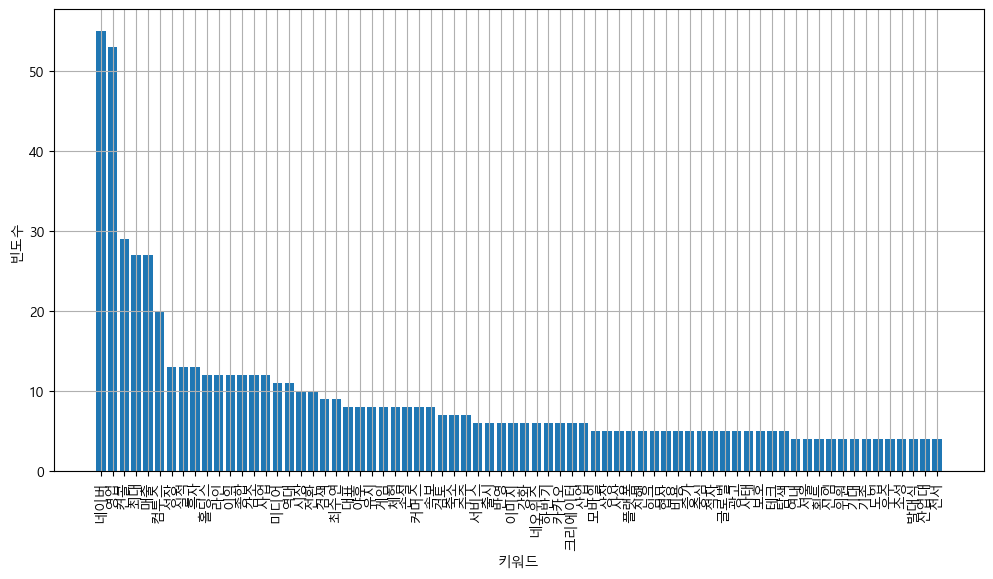

In [7]:
# 시각화1, 막대 그래프 
# 폰트 임포트 , 메모리에 설정 
font_path = "c:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

#, x축, y축, 가로x세로 비율, x 라벨, 폰트 설정 등
plt.figure(figsize=(12,6))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

# 딕션너리의 키, 값 , 정렬 내림차순 
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(),reverse=True)

# 막대 그래프 그리기. 
plt.bar(range(len(word_count)), sorted_Values, align="center")

# x 축 라벨 설정. 
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = "vertical")

plt.show()

In [8]:
# !pip install Numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


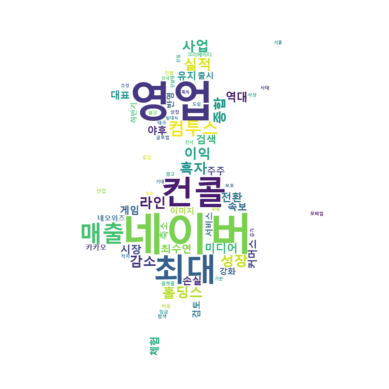

In [8]:
# 시각화2, 워드 클라우드 
import numpy as np

import os
import re
from PIL import Image
from os import path

alice_mask = np.array(Image.open("alice_mask.png"))

# 실행시, 한글이 깨져서, 해당 폰트 패스 경로 지정 필요.
wc = WordCloud(font_path, background_color="white", max_words=1000, mask=alice_mask,width=800,height=1000)
# generate word cloud
sampleImage = wc.generate_from_frequencies(word_count)

# show
plt.imshow(sampleImage, interpolation="bilinear")
# plt.imshow(sampleImage)

plt.axis("off")
plt.show()

In [9]:
# 해당 출력을 이미지로 저장 하기. 
sampleImage.to_file(inputFileName + "_cloud.jpg")